## DECISION TREE REGRESSION WITH BOSTON HOUSE PRICES DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.get('DESCR'))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [10]:
df = x.copy()
df['Price'] = y

In [11]:
print(df.columns.to_list())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']


<AxesSubplot:xlabel='CRIM', ylabel='Price'>

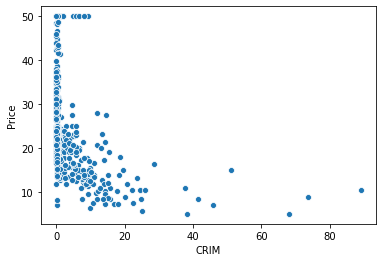

In [12]:
sns.scatterplot(x='CRIM', y='Price',data=df)

<AxesSubplot:xlabel='ZN', ylabel='Price'>

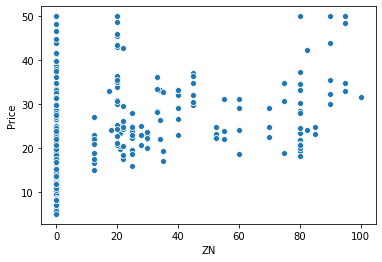

In [13]:
sns.scatterplot(x='ZN',y='Price',data=df)

<AxesSubplot:xlabel='DIS', ylabel='Price'>

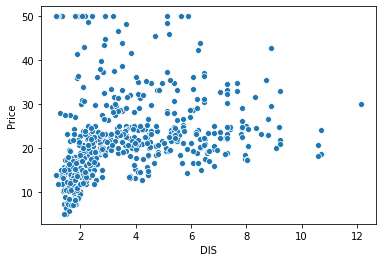

In [14]:
sns.scatterplot(x='DIS',y='Price', data=df)

In [15]:
# as we can know that all the data are in scattered form so we cannot apply linear regression for prediction. 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [16]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=.2, random_state = 0)

In [17]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(trainx,trainy)

DecisionTreeRegressor(max_depth=10)

In [19]:
score = regr.score(testx,testy)*100
score

60.70441483887108

In [20]:
ypred = regr.predict(x)

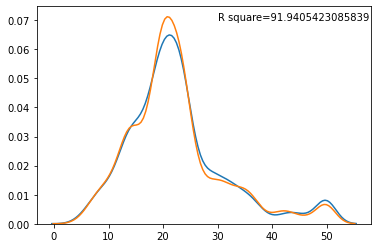

In [22]:
sns.distplot(y,hist=False)
sns.distplot(ypred,hist=False)
plt.text(30,0.07,f'R square={regr.score(x,y)*100}')
plt.show()

In [24]:
import pickle

with open('../../models/boston_pricing_decision_tree_model.pkl','wb') as f:
    pickle.dump(regr, f)
    print('model saved')

model saved


In [25]:
with open('../../models/boston_pricing_decision_tree_model.pkl','rb') as f:
    model = pickle.load(f)
    print('model loaded')

model loaded


In [26]:
model

DecisionTreeRegressor(max_depth=10)